# Author: Faique Ali

## Task 05 : Exploratory Data Analysis - Sports
<ul>
    <li>From the given <b>Indian Premier League</b> dataset, perform 'Exploratory Data Analysis.</li>
    <li>As a sports analyst, try to find out the most successful teams, players and factors contributing win or loss of a team.</li>
    <li>Suggesr teams or players a company should endorse for its products.</li>
</ul>

# Imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Constants

In [2]:
DATASET_1_PATH = 'Indian Premier League/matches.csv'
DATASET_2_PATH = 'Indian Premier League/deliveries.csv'

# Step1: Gather the Dataset

#### Loading the 'Matches' Dataset

In [3]:
# Load the dataset
data_matches = pd.read_csv(DATASET_1_PATH)

# Show first 5 values
data_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data_matches.shape

(756, 18)

In [5]:
# Checking for null values
data_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### Loading the 'Deliveries' Dataset

In [6]:
# Load the dataset
data_deliveries = pd.read_csv(DATASET_2_PATH)

# Show first 5 values
data_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
data_deliveries.shape

(179078, 21)

In [8]:
# Checking for null values
data_deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

# Step2: Cleaning and Transformation

Dropping `umpire3` from matches dataset. As it contains alot of null values.

In [9]:
data_matches.drop(['umpire3'], axis=1, inplace=True)

Filling all `Nan` values with 0

In [10]:
data_deliveries.fillna(0, inplace=True)

# Step3: Basic Analysis

### Information to better understand the datasets

In [11]:
print(f'Total Matches Played: {data_matches.shape[0]}')

Total Matches Played: 756


In [12]:
print(f'All Venues: {data_matches["city"].unique()}')
print(f'\nVenues Count: {data_matches["city"].nunique()}')

All Venues: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']

Venues Count: 32


In [13]:
print(f'All Teams: {data_matches["team1"].unique()}')
print(f'\nTeams Count: {data_matches["team1"].nunique()}')

All Teams: ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']

Teams Count: 15


In [14]:
print(f'Total Man of the matches: {data_matches["player_of_match"].unique().size}')

Total Man of the matches: 227


In [15]:
print(f'Highest Man of the matches: {data_matches["player_of_match"].value_counts().idxmax()}')

Highest Man of the matches: CH Gayle


In [16]:
print(f'Total times CH Gayle is man of the match: {data_matches["player_of_match"].value_counts().max()}')

Total times CH Gayle is man of the match: 21


In [17]:
print(f'Team with the most wins: {data_matches["winner"].value_counts().idxmax()}')

Team with the most wins: Mumbai Indians


In [18]:
print(f'Mumbai Indians total wins: {data_matches["winner"].value_counts().max()}')

Mumbai Indians total wins: 109


#### Team win by most number of runs

In [19]:
df=data_matches.iloc[data_matches['win_by_runs'].idxmax()]
df[['season','team1', 'team2','winner','win_by_runs']]

season                     2017
team1            Mumbai Indians
team2          Delhi Daredevils
winner           Mumbai Indians
win_by_runs                 146
Name: 43, dtype: object

#### Team win by most number of wickets

In [20]:
df=data_matches.iloc[data_matches['win_by_wickets'].idxmax()]
df[['season','team1', 'team2','winner','win_by_wickets']]

season                             2017
team1                     Gujarat Lions
team2             Kolkata Knight Riders
winner            Kolkata Knight Riders
win_by_wickets                       10
Name: 2, dtype: object

# Step4: Visualization

### Season in which most matches were played

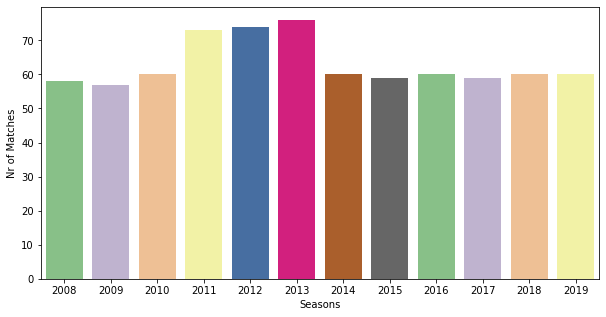

In [21]:
# Plot Setting
plt.figure(figsize=(10,5))

# Count plot
sns.countplot(x='season', data=data_matches, palette='Accent')

plt.xlabel('Seasons')
plt.ylabel('Nr of Matches')

plt.show()

### Cities which host most matches

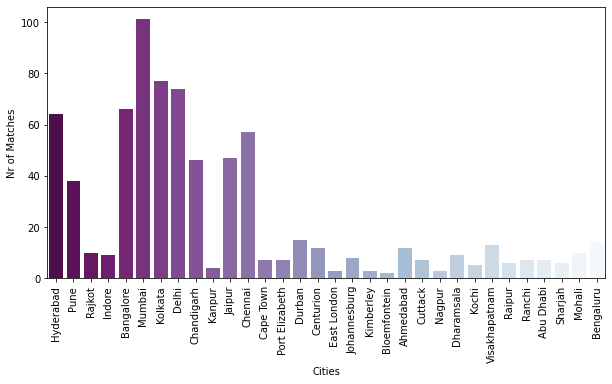

In [22]:
# Plot Setting
plt.figure(figsize=(10,5))

# Count plot
sns.countplot(x='city', data=data_matches, palette='BuPu_r')

plt.xlabel('Cities')
plt.ylabel('Nr of Matches')
plt.xticks(rotation=90)

plt.show()

### Stadium which host most matches

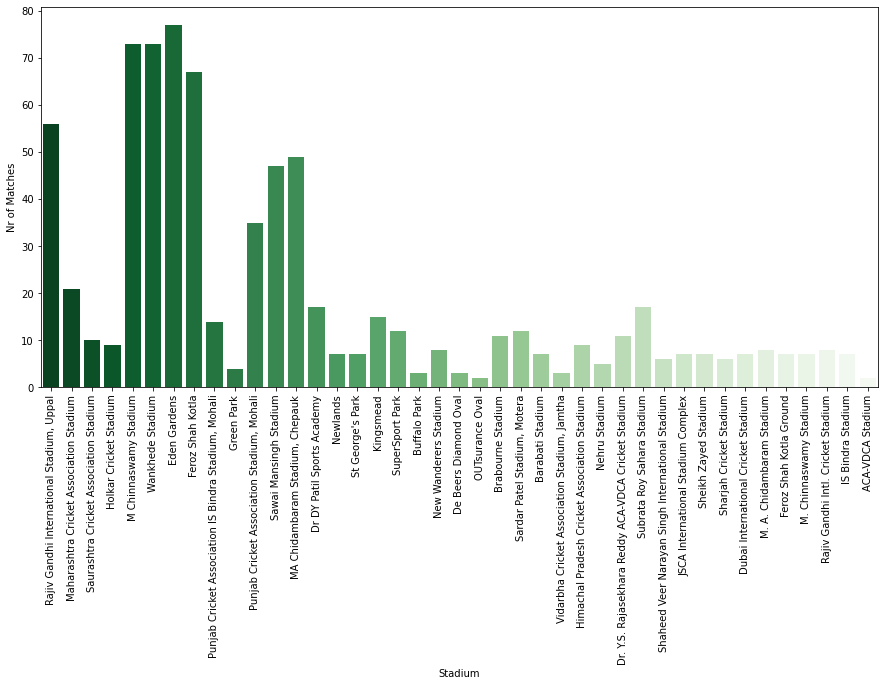

In [23]:
# Plot Setting
plt.figure(figsize=(15,7))

# Count plot
sns.countplot(x='venue', data=data_matches, palette='Greens_r')

plt.xlabel('Stadium')
plt.ylabel('Nr of Matches')
plt.xticks(rotation=90)

plt.show()

### Toss Decisions

In [24]:
total_times_field_first = data_matches['toss_decision'].value_counts()[0]
total_times_bat_first = data_matches['toss_decision'].value_counts()[1]

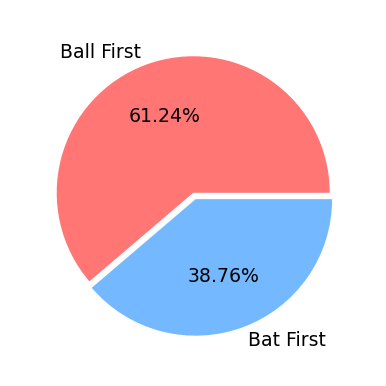

In [25]:
category_names = ['Ball First', 'Bat First']
sizes = [total_times_field_first, total_times_bat_first]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2,2), dpi=226)   #dpi=display pixel per inch
plt.pie(sizes, labels=category_names,
        textprops={'fontsize': 6},
        autopct='%1.2f%%', colors=custom_colours,  #autopct = format for % label
        explode=[0,0.05])    # explode =distance of pie slice
plt.show()

### Toss Decisions across Seasons

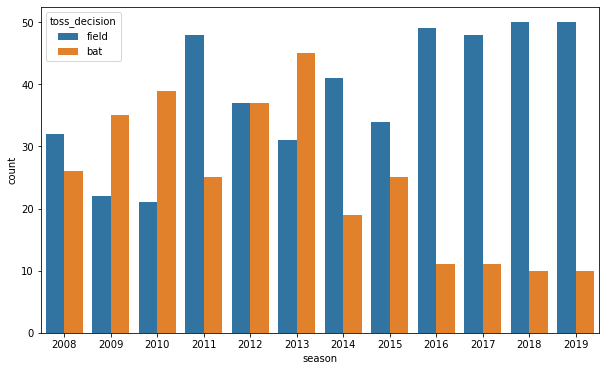

In [26]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season', hue='toss_decision', data=data_matches)
plt.show()

### Maximum Toss Winners

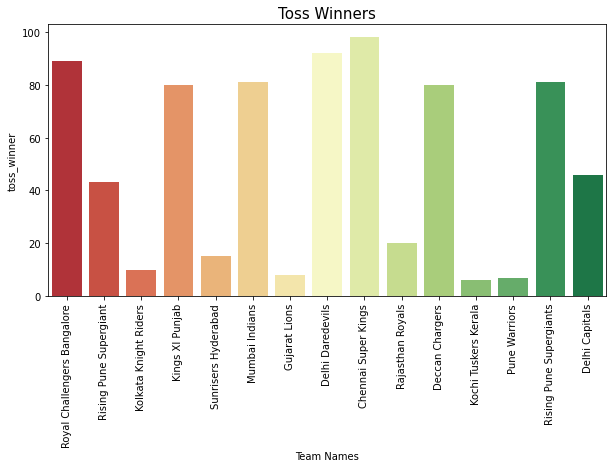

In [27]:
x_toss_winner = data_matches['toss_winner'].unique()
y_toss_winner = data_matches['toss_winner'].value_counts().sort_index()

# Plot Setting
plt.figure(figsize=(10,5))
plt.title('Toss Winners', fontsize=15)
plt.xlabel('Team Names')
plt.ylabel('Nr of Wins')
plt.xticks(rotation=90)

# Bar plot
sns.barplot(x=x_toss_winner, y=y_toss_winner, palette='RdYlGn')

plt.show()

### Nr of Times `Toss Winners` also Won the match

In [28]:
df = [data_matches['toss_winner']==data_matches['winner']]
total_times_toss_winner_won_match = sum(df[0][:])
total_times_toss_winner_not_won_match = len(df[0]) - total_times_toss_winner_won_match

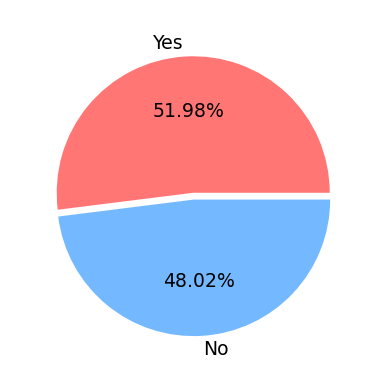

In [29]:
total_times_field_first = data_matches['toss_decision'].value_counts()[0]
total_times_bat_first = data_matches['toss_decision'].value_counts()[1]

category_names = ['Yes', 'No']
sizes = [total_times_toss_winner_won_match, total_times_toss_winner_not_won_match]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2,2), dpi=226)   #dpi=display pixel per inch
plt.pie(sizes, labels=category_names,
        textprops={'fontsize': 6},
        autopct='%1.2f%%', colors=custom_colours,  #autopct = format for % label
        explode=[0,0.05])    # explode =distance of pie slice
plt.show()

### Nr of Matches won by Teams

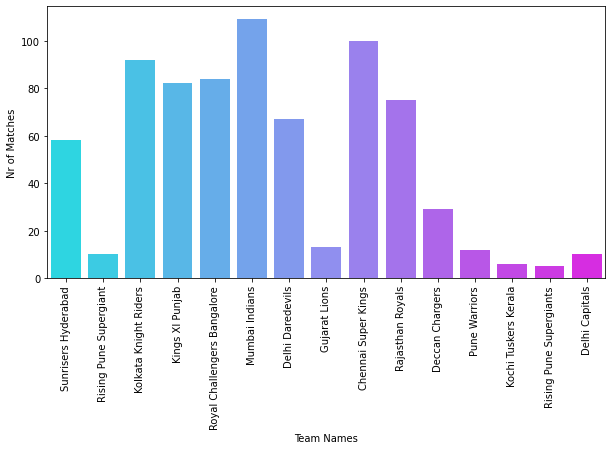

In [30]:
# Plot Setting
plt.figure(figsize=(10,5))

# Count plot
sns.countplot(x='winner', data=data_matches, palette='cool')

plt.xlabel('Team Names')
plt.ylabel('Nr of Matches')
plt.xticks(rotation=90)

plt.show()

### Winning Percentage of Teams

In [31]:
df = pd.melt(data_matches, id_vars=['id','season'], value_vars=['team1', 'team2'])
df

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore
...,...,...,...,...
1507,11347,2019,team2,Mumbai Indians
1508,11412,2019,team2,Mumbai Indians
1509,11413,2019,team2,Delhi Capitals
1510,11414,2019,team2,Chennai Super Kings


In [32]:
total_played_matches = df['value'].value_counts()
total_played_matches = total_played_matches.to_frame()
total_played_matches['Team'] = total_played_matches.index
total_played_matches = total_played_matches.sort_values('Team', ascending=True)

In [33]:
total_won_matches = data_matches["winner"].value_counts()
total_won_matches = total_won_matches.to_frame()
total_won_matches['Team'] = total_won_matches.index
total_won_matches = total_won_matches.sort_values('Team', ascending=True)

In [34]:
df1 = total_played_matches.copy()
df1['Wins'] = np.where(df1['Team'] == total_won_matches['Team'], total_won_matches['winner'], False)
df1.reset_index(drop=True, inplace=True)
df1 = df1.reindex(['Team','value','Wins'],axis=1)
df1 = df1.rename(columns={'value': 'Matches Played'})
df1['Winning Percent'] = df1['Wins'] / df1['Matches Played'] * 100
df1 = df1.sort_values('Winning Percent', ascending=False)
df1

,Team,Matches Played,Wins,Winning Percent
2,Delhi Capitals,16,10,62.500000
11,Rising Pune Supergiant,16,10,62.500000
0,Chennai Super Kings,164,100,60.975610
8,Mumbai Indians,187,109,58.288770
14,Sunrisers Hyderabad,108,58,53.703704
7,Kolkata Knight Riders,178,92,51.685393
10,Rajasthan Royals,147,75,51.020408
13,Royal Challengers Bangalore,180,84,46.666667
5,Kings XI Punjab,176,82,46.590909
4,Gujarat Lions,30,13,43.333333


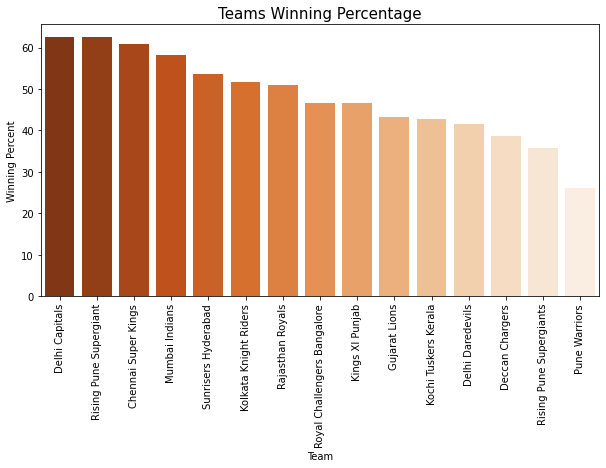

In [35]:
# Plot Setting
plt.figure(figsize=(10,5))
plt.title('Teams Winning Percentage', fontsize=15)
plt.xlabel('Team Names')
plt.ylabel('Percentage')
plt.xticks(rotation=90)

# Bar plot
sns.barplot(x=df1['Team'], y=df1['Winning Percent'], palette='Oranges_r')

plt.show()

### Runs across the Seasons

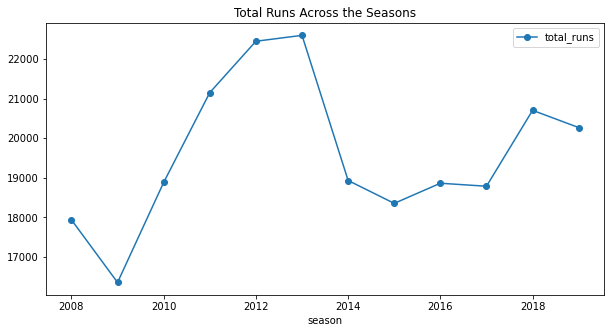

In [36]:
# Merging matches and deliveries dataset by referencing the id and match_id columns
df_runs = data_matches[['id', 'season']].merge(data_deliveries, 
                                               left_on='id', right_on='match_id',
                                               how='left').drop('id', axis=1)

# Group df by seasons and then sum total_runs for every group
season = df_runs.groupby(['season'])['total_runs'].sum().reset_index()
season.set_index('season').plot(marker='o')

# Plotting
plt.gcf().set_size_inches(10,5)
plt.title('Total Runs Across the Seasons')
plt.show()

As the Number of matches are not equal in every season. We should check for average runs per match

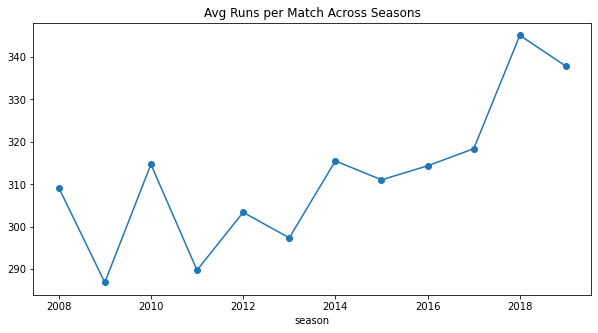

In [37]:
avg_runs = data_matches.groupby(['season']).count().id.reset_index()
avg_runs.rename(columns={'id':'matches'}, inplace=1)
avg_runs['total_runs'] = season['total_runs']
avg_runs['avg_runs_per_match'] = avg_runs['total_runs'] / avg_runs['matches']
avg_runs.set_index('season')['avg_runs_per_match'].plot(marker='o')

plt.gcf().set_size_inches(10,5)
plt.title('Avg Runs per Match Across Seasons')
plt.show()

### Six and Fours Across the Season

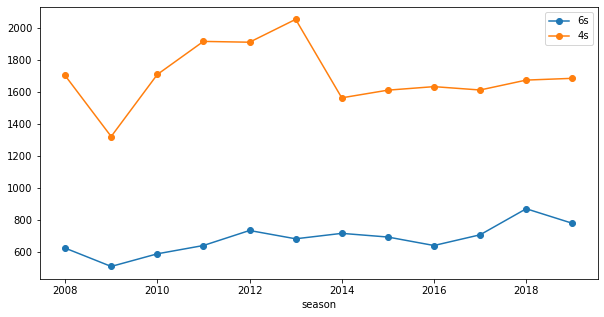

In [38]:
boundaries = df_runs.groupby('season')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
fours = df_runs.groupby('season')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()

boundaries = boundaries.merge(fours, left_on='season', right_on='season', how='left')
boundaries = boundaries.rename(columns={'batsman_runs_x': '6s', 'batsman_runs_y': '4s'})
boundaries.set_index('season')[['6s','4s']].plot(marker='o')

plt.gcf().set_size_inches(10,5)
plt.show()

### Season Winners

In [39]:
for i in range(2008,2019):
    df_winners=((data_matches[data_matches['season']==i]).iloc[-1])
    print(df_winners[[1,10]].values)

[2008 'Rajasthan Royals']
[2009 'Deccan Chargers']
[2010 'Chennai Super Kings']
[2011 'Chennai Super Kings']
[2012 'Kolkata Knight Riders']
[2013 'Mumbai Indians']
[2014 'Kolkata Knight Riders']
[2015 'Mumbai Indians']
[2016 'Sunrisers Hyderabad']
[2017 'Mumbai Indians']
[2018 'Chennai Super Kings']


### Super Over

In [40]:
print("Total Super Overs: ",data_deliveries[data_deliveries['is_super_over']==1].match_id.nunique())

Total Super Overs:  7


### Batsman With Top Runs Scored in IPL

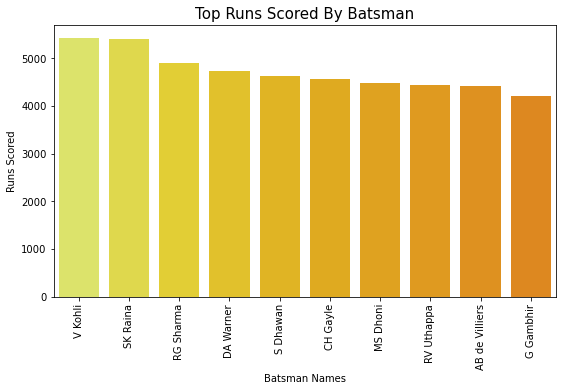

In [41]:
top_scores = data_deliveries.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
top_scores = top_scores.iloc[:10,:]

# Plot Setting
plt.figure(figsize=(9,5))

# Bar plot
sns.barplot(x=top_scores['batsman'], y=top_scores['batsman_runs'], palette='Wistia')

plt.title('Top Runs Scored By Batsman', fontsize=15)
plt.xlabel('Batsman Names')
plt.ylabel('Runs Scored')
plt.xticks(rotation=90)

plt.show()

### Batsman with most 6s

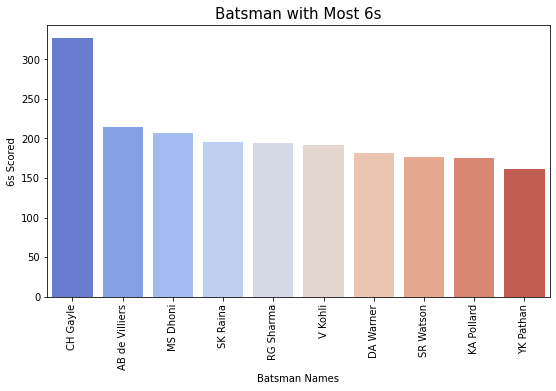

In [42]:
most_sixes = data_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
most_sixes = most_sixes.sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
most_sixes = most_sixes.iloc[:10,:]

# Plot Setting
plt.figure(figsize=(9,5))

# Bar plot
sns.barplot(x=most_sixes['batsman'], y=most_sixes['batsman_runs'], palette='coolwarm')

plt.title('Batsman with Most 6s', fontsize=15)
plt.xlabel('Batsman Names')
plt.ylabel('6s Scored')
plt.xticks(rotation=90)

plt.show()

### Batsman with most dot balls played

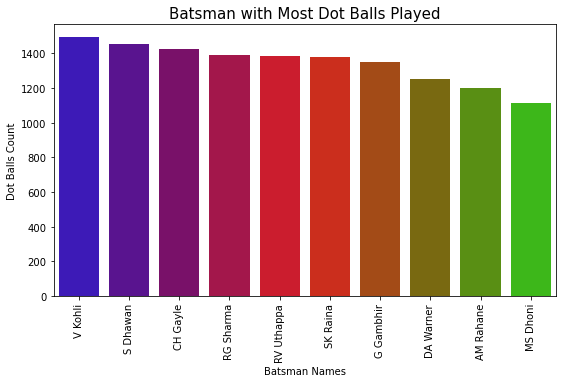

In [43]:
most_dot_balls = data_deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
most_dot_balls = most_dot_balls.sort_values(by='batsman_runs',ascending=False).reset_index(drop=True)
most_dot_balls = most_dot_balls.iloc[:10,:]

# Plot Setting
plt.figure(figsize=(9,5))

# Bar plot
sns.barplot(x=most_dot_balls['batsman'], y=most_dot_balls['batsman_runs'], palette='brg')

plt.title('Batsman with Most Dot Balls Played', fontsize=15)
plt.xlabel('Batsman Names')
plt.ylabel('Dot Balls Count')
plt.xticks(rotation=90)

plt.show()

### Bowlers With Most Wickets

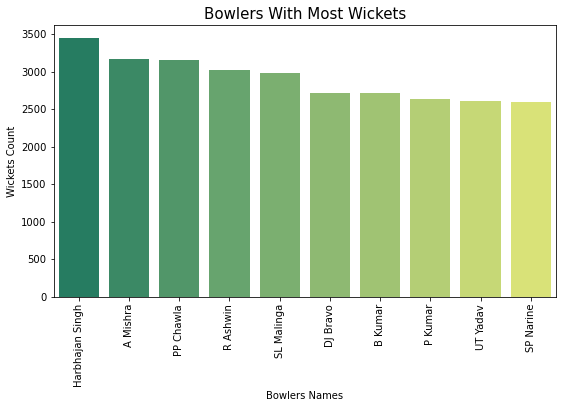

In [44]:
most_wickets = data_deliveries.groupby('bowler')['ball'].agg('count').reset_index()
most_wickets = most_wickets.sort_values(by='ball',ascending=False).reset_index(drop=True)
most_wickets = most_wickets.iloc[:10,:]

# Plot Setting
plt.figure(figsize=(9,5))

# Bar plot
sns.barplot(x=most_wickets['bowler'], y=most_wickets['ball'], palette='summer')

plt.title('Bowlers With Most Wickets', fontsize=15)
plt.xlabel('Bowlers Names')
plt.ylabel('Wickets Count')
plt.xticks(rotation=90)

plt.show()

### Bowlers With Most Number of Dot balls

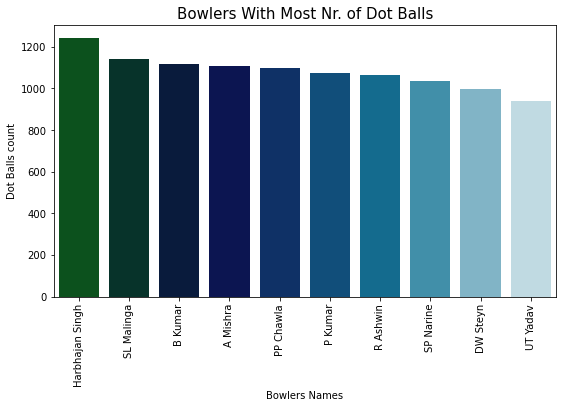

In [45]:
most_dot_balls = data_deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index()
most_dot_balls = most_dot_balls.sort_values(by='total_runs',ascending=False).reset_index(drop=True)
most_dot_balls = most_dot_balls.iloc[:10,:]

# Plot Setting
plt.figure(figsize=(9,5))

# Bar plot
sns.barplot(x=most_dot_balls['bowler'], y=most_dot_balls['total_runs'], palette='ocean')

plt.title('Bowlers With Most Nr. of Dot Balls', fontsize=15)
plt.xlabel('Bowlers Names')
plt.ylabel('Dot Balls count')
plt.xticks(rotation=90)

plt.show()

### Bowlers With Most 6s Hit in their overs

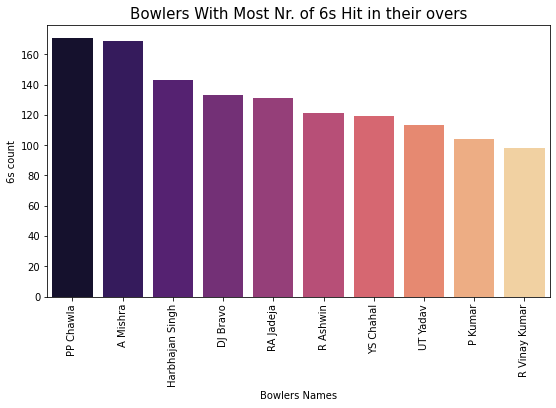

In [46]:
most_sixes_hits = data_deliveries.groupby('bowler')['total_runs'].agg(lambda x: (x==6).sum()).reset_index()
most_sixes_hits = most_sixes_hits.sort_values(by='total_runs',ascending=False).reset_index(drop=True)
most_sixes_hits = most_sixes_hits.iloc[:10,:]

# Plot Setting
plt.figure(figsize=(9,5))

# Bar plot
sns.barplot(x=most_sixes_hits['bowler'], y=most_sixes_hits['total_runs'], palette='magma')

plt.title('Bowlers With Most Nr. of 6s Hit in their overs', fontsize=15)
plt.xlabel('Bowlers Names')
plt.ylabel('6s count')
plt.xticks(rotation=90)

plt.show()

### Favorite Umpires

In [47]:
umpires = pd.concat([data_matches['umpire1'], data_matches['umpire2']])

In [48]:
umpires = pd.DataFrame(umpires, columns=['Umpires'])


In [49]:
umpires_names = umpires['Umpires'].value_counts()
umpires_names[:20]

S Ravi             106
HDPK Dharmasena     87
C Shamshuddin       73
AK Chaudhary        58
SJA Taufel          55
M Erasmus           54
Asad Rauf           51
BR Doctrove         42
Nitin Menon         42
RE Koertzen         41
CK Nandan           41
VA Kulkarni         39
Aleem Dar           38
RJ Tucker           38
BF Bowden           37
BNJ Oxenford        32
SK Tarapore         31
RB Tiffin           30
S Asnani            30
DJ Harper           27
Name: Umpires, dtype: int64